<a href="https://colab.research.google.com/github/GallardoCarmen/APRENDIZAJE_AUTOMATICO_23_24/blob/main/P1Grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P1 AA Configuración y Entrenamiento de una Red de Neuronas_23_24**




Grupo 1

Carmen Gallardo Martín, Marta Herraiz Méndez, Pablo Mendieta Ruiz

**ENUNCIADO:**
Crea un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar
imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado,
entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.


In [12]:
# 1._ IMPORTAMOS KERAS

import tensorflow as tf
from tensorflow import keras
import numpy as np

from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Comprobamos que hay 60000 imágenes de entrenamiento y otras 10000 de test


In [13]:
# Vemos la matriz de la imagen número 30.000 (28x28)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30000]))

[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 215 219 216 238 160   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 185 231 218 221 215 218 214 238 170   

In [14]:
# Vemos que la imagen número 30.000 corresponde al número 3(dress)
train_labels[30000]

3

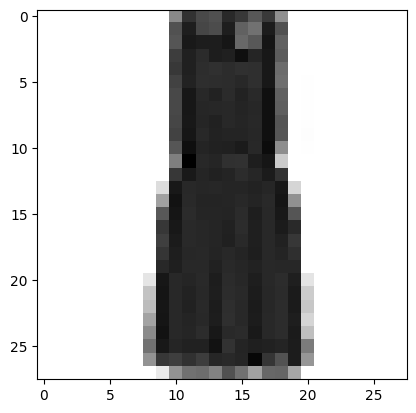

In [15]:
# Veamos el elemento 30000 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[30000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**CONSTRUIMOS LA RNA**

In [16]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos

network = models.Sequential()
# Creamos dos capas "Dense", que son capas neuronales densamente conectadas
# (también llamadas "completamente conectadas"). Cada una de las 512 neuronas de
# la capa de entrada están conectadas con los 784 píxeles = 28*28. Solo lo
# definimos para la primera capa. Para la segunda capa y posteriores, Keras lo
# deduce.

network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# Probar 10 neuronas y 'sigmoid' <==============================================
# Capa de salida "softmax" de 10 vías (o neuronas). Significa que
# devolverá una matriz de 10 puntuaciones de probabilidad (sumando 1)
# La puntuación será la probabilidad de que la imagen del dígito actual
# pertenezca a una de nuestras clases de 10 dígitos.

network.add(layers.Dense(10, activation='softmax'))
# Cada capa aplica unas cuantas operaciones con tensores sencillas a los datos
# de entrada, y que estas operaciones implican tensores de pesos. Los tensores
# de peso, que son los atributos de las capas, son donde persiste el
# "conocimiento" de la red.
# En general, la capa de salida de una red de clasificación tendrá tantas
# neuronas como clases, menos en la clasificación binaria, que con 1 vale. Cada
# valor será la probabilidad de que la imagen del dígito actual pertenezca a cada
# una de las clases

network.summary()
# Nombre de las capas automáticos a no ser que lo definamos
# 401.920 = 784 x 512 + 512 Sesgo
# 5.130 = 512x10 + 10 Sesgo
# 407.050 = 401.920 + 5.130

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


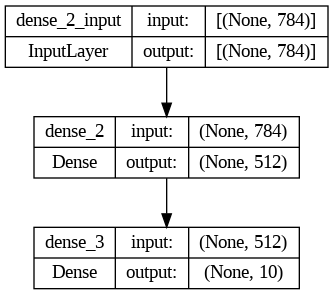

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

In [18]:
# 4.- HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
network.compile(optimizer='sgd', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# 'categorical_crossentropy' es la función de pérdida que se utiliza como señal
# de retroalimentación para aprender los tensores de peso y que la fase de
# entrenamiento intentará minimizar
# La reducción de la pérdida se produce mediante el descenso de gradiente
# estocástico minilote, cuyas reglas exactas están gobernadas por el optimizador
# 'rmsprop'
# 'accuracy': Solo tendremos en cuenta la fracción de imágenes que son
# correctamente clasificadas


In [19]:
# 5.- PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))


test_images = test_images.reshape((10000, 28 * 28))


print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000
(60000, 784)
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    3   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239
  255 216 172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159
  108   0   0   0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145 178 159 174 160 123 132 142 172  38   0   0   0   0   0
    0   0   0   0   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167 122   0   0   0   0   0   0   0   0   0   0   0 171
  135 120 114 118 119 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0   0   0   0   4 171 138 126 120 117 118 102 122
  145 111

In [20]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]



(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.51, 0.36, 0.58, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.78, 0.67, 0.76, 0.6 , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.49, 0.76, 0.65,
        0.94, 1.  , 0.85, 0.67, 0.89, 0.49, 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.38,
        0.65, 0.61, 0.62, 0.67, 0.7 , 0.83, 0.84, 0.82, 0.77, 0.74, 0.62, 0.64, 0.62, 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

In [21]:
# 6.- PREPARACIÓN LAS ETIQUETAS
# from keras import utils
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
# la imagen 30000 de entrenamiento es 3 (dress)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
# * epochs: Épocas: un límite arbitrario, definido como
# "una pasada sobre todo el conjunto de datos", que se utiliza para
# separar el entrenamiento en distintas fases, que es útil para el
# registro y la evaluación periódica. Como no hay initial_epoch, en
# este caso va hasta la época 5 desde 1.
# tamaño del lote
# * batch_size: Entero o NULO. Número de muestras por actualización de gradiente.
# Si no se especifica, batch_size se establecerá de forma predeterminada en 32.
network.fit(train_images, train_labels, epochs=5, batch_size=128)
# La red empezará a iterar por lo datos de entrenamiento en minilotes de 128
# muestras, 5 veces (cada iteración por los datos de entrenamiento recibe el
# nombre de "repetición"). En cada iteración, la red computará los gradientes de
# los pesos en relación con la pérdida en el lote y ajustará los pesos en
# consecuencia. Tras estas 5 repeticiones, la red habrá realizado 2.345 ajustes
# de gradiente (469 por repetición), la pérdida será lo bastante baja como para
# que la red sea capaz de clasificar números escritos a mano con gran exactitud.

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.9958 - accuracy: 0.7000
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.6571 - accuracy: 0.7915
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5801 - accuracy: 0.8116
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5385 - accuracy: 0.8232
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.5120 - accuracy: 0.8300


In [23]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 3ms/step - loss: 68.5899 - accuracy: 0.7988


6. Utilice el siguiente código para graficar cómo de bien o de mal se comporta el
modelo para cada uno de los 8 casos

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  pedictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.ytickts([])

  plt.imshow(img, camp=plt.cm.binary)
  if predicted_label == true_label :
    color = 'blue'
  else :
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label]
                                     100*np.max(predictions_array)
                                     class_names[true_label])
                                     color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].setcolor('blue')



SyntaxError: ignored

Ejemplo de uso para ver la predicción de la 6ª figura de las imágenes de test.

In [ ]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plot.subplot(1,2,2)
plotvalue_array(i,predictions[i], test_labales)
plt.show()


NameError: ignored